# NETWORK ANALYSIS OF SHAKESPEARE'S MACBETH

## By Moses Boudourides & Sergios Lenis

### With contributions from the Group of participants of "Literature Networks"

# I. Extraction of Shakespeare's Macbeth Network

In [6]:
%matplotlib inline 
%load_ext autoreload
from IPython.display import display
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle
from prettytable import PrettyTable #sudo pip install prettytable
from utils import *
# def choid(x):
#     return x

## Text Preparation

The text file of Shakespeare's Macbeth was downloaded from Project Gutenberg and it was modified in such a way that all the names of characters (as "actors" in the social networks sense) appear as such in a uniform way. 

In [2]:
f=open('corpora/ShakespeareHamletOrig_from_PG.txt')
for lin in f:
    print(lin)

﻿Project Gutenberg Etext of Hamlet by Shakespeare

PG has multiple editions of William Shakespeare's Complete Works





Copyright laws are changing all over the world, be sure to check

the copyright laws for your country before posting these files!!



Please take a look at the important information in this header.

We encourage you to keep this file on your own disk, keeping an

electronic path open for the next readers.  Do not remove this.





**Welcome To The World of Free Plain Vanilla Electronic Texts**



**Etexts Readable By Both Humans and By Computers, Since 1971**



*These Etexts Prepared By Hundreds of Volunteers and Donations*



Information on contacting Project Gutenberg to get Etexts, and

further information is included below.  We need your donations.





Hamlet, Prince of Denmark



by William Shakespeare [Collins edition]



November, 1998 [Etext #1524]

Most recently updated: January 26, 2009





Project Gutenberg Etext of Hamlet by Shakespeare

******This fil

In [3]:
f=open('corpora/HamletShakespeare.txt')
for lin in f:
    print (lin)

Project Gutenberg Etext of Hamlet by Shakespeare

PG has multiple editions of William Shakespeare's Complete Works





Copyright laws are changing all over the world, be sure to check

the copyright laws for your country before posting these files!!



Please take a look at the important information in this header.

We encourage you to keep this file on your own disk, keeping an

electronic path open for the next readers.  Do not remove this.





**Welcome To The World of Free Plain Vanilla Electronic Texts**



**Etexts Readable By Both Humans and By Computers, Since 1971**



*These Etexts Prepared By Hundreds of Volunteers and Donations*



Information on contacting Project Gutenberg to get Etexts, and

further information is included below.  We need your donations.





Hamlet, Prince of Denmark



by William Shakespeare [Collins edition]



November, 1998 [Etext #1524]

Most recently updated: January 26, 2009





Project Gutenberg Etext of Hamlet by Shakespeare

******This file

In [4]:
fileName = 'corpora/HamletShakespeare.txt'
f=open(fileName,'r')
attributes_filename='corpora/Hamlet_attributes.csv'
for lin in open(attributes_filename):
    print lin

Name,Gender,Social Status

King,Male,Royalty

Hamlet,Male,Royalty

Polonius,Male,Courtier

Horatio,Male,Courtier

Laertes,Male,Courtier

Voltimand,Male,Courtier

Cornelius,Male,Courtier

Rosencrantz,Male,Courtier

Guildenstern,Male,Courtier

Osric,Male,Courtier

Gentleman,Male,Courtier

1 Priest,Male,Courtier

Marcellus,Male,Officer

Bernardo,Male,Officer

Francisco,Male,Officer

Reynaldo,Male,Commoner

1 Clown,Male,Commoner

2 Clown,Male,Commoner

Fortinbras,Male,Royalty

Captain,Male,Officer

Ghost,Male,Supernatural

Queen,Female,Royalty

Ophelia,Female,Courtier

Sailor,Male,Commoner

Messenger,Male,Commoner



In [9]:
%autoreload 2
from testy_0 import *
from syntheticThreeLayerGraph_time import synthetic_multi_level_dict,plot_graph_dict,plot_graph_k_n, plot_total_graph_with_weights

act_dict,u,pers_l,pers_dict,pact,lact,scen_dict,lscen,pscen=create_dict_of_acts(fileName)

print 'Characters (actors) appearing in Macbeth:'
print
for actor in pers_l:
    print actor
print
print 'The number of characters (actors) in Macbeth is', len(pers_l)
print 
print 'ATTRIBUTES of characters (actors) appearing in Macbeth:'
print
attribute_dict={}
af=open(attributes_filename,'r')
lis_pret=['Gender','Social Status']
pret=PrettyTable(lis_pret)
pret.padding_width=1
print
print 'Names not associated in attributes file'
list_of_attributes_dic={}
list_of_att=[]
for lin in af:
    ll=lin.strip().split(',')
    momo=0
    
    if ll[0]=='Name':
        list_of_att={il:l.strip() for il,l in enumerate(ll)}
        continue
    try:
        for k,l in pers_dict[ll[0]].items():
            momo+= len(l)
    except:
        momo=0
    ll.append(momo)
    pret.add_row(ll)  
    if ll[0].strip() in pers_l:
#         print ll
        for en,vv in enumerate(ll[:-1]):
#             print en,vv
            if list_of_att[en] not in list_of_attributes_dic:
                list_of_attributes_dic[list_of_att[en]]=set()
                list_of_attributes_dic[list_of_att[en]].add(ll[en].strip())
            else:
                list_of_attributes_dic[list_of_att[en]].add(ll[en].strip())
        attribute_dict[ll[0].strip()]=(ll[1].strip(),ll[2].strip(),ll[3].strip(),ll[4].strip(),momo)
    else:
        print ll,'no'
print
print 'Atributes'
print pret
fop=open('list_of_attributes_dic.dmpp','w')
pickle.dump(list_of_attributes_dic,fop)
fop.close()
fop=open('attribute_dict.dmpp','w')
pickle.dump(attribute_dict,fop)
fop.close()
fop=open('list_of_att.dmpp','w')
pickle.dump(list_of_att,fop)
fop.close()

Characters (actors) appearing in Macbeth:

King
Hamlet
Polonius
Horatio
Laertes
Voltimand
Cornelius
Rosencrantz
Guildenstern
Osric
Gentleman
1 Priest
Marcellus
Bernardo
Francisco
Reynaldo
1 Clown
2 Clown
Fortinbras
Captain
Ghost
Queen
Ophelia
Sailor
Messenger

The number of characters (actors) in Macbeth is 25

ATTRIBUTES of characters (actors) appearing in Macbeth:


Names not associated in attributes file


Exception: Row has incorrect number of values, (actual) 4!=2 (expected)

## Detection of characters (actors) and conversational relationships (ties) among them

The relationship (tie) among the above characters (actors) detected (automatically) here is the so-called "conversational relationship" which is defined whenever two characters are co-participating in a conversation. Actually, due to the structure of Shakespeare's printed text (in Project Gutenberg), the unit of conversation (or conversational chunk) used here is the body of the text which is delimited between two empty lines. In this way, the resulting network is represented by a weighted undirected graph, where tha weight of a edge joining two characters is the total number of conversational chaunks that these characters are involved in. Moreover, we are decomposing the network into slices (or layers) according to one of the five Acts during which the measured coversations take place.

## Decomposition of Shakespeare's Macbeth in Networks of Acts

In [11]:
graph_dic,ract_dic,pernode_dict,nodper_dic,cnum,active_actors=create_graph_dict(act_dict,pers_l,pers_dict,u,attribute_dict)
G, list_of_Graphs_final, Gagr, edgeList ,nmap ,mapping,k,n=synthetic_multi_level_dict(graph_dic,pernode_dict,nodper_dic,ract_dic,No_isolates=True)
conver_rel = 0

pos_dict={}

for k,v in graph_dic.items():
    v.remove_nodes_from(nx.isolates(v))
    print nx.info(v)
    conver_rel += len(v.edges())
    print
    
print 'Characters (actors) appearing in Macbeth in all conversational relationships in all Acts:'  
print
for i in pernode_dict:
    print i
print
print 'The total number of characters (actors) appearing in Macbeth in all conversational relationships in all Acts is', len(pernode_dict.keys())
print 
print 'The total number of conversational relationships (edges) among characters (actors) \
taking place in all Acts of Macbeth is', conver_rel
met_acts={'Act '+str(i):u for u,i in enumerate(sorted(graph_dic.keys())) }
rmet_acts={k:v for v,k in met_acts.items()}

Name: Act I
Type: Graph
Number of nodes: 10
Number of edges: 13
Average degree:   2.6000

Name: Act II
Type: Graph
Number of nodes: 8
Number of edges: 10
Average degree:   2.5000

Name: Act IV
Type: Graph
Number of nodes: 12
Number of edges: 17
Average degree:   2.8333

Name: Act III
Type: Graph
Number of nodes: 15
Number of edges: 21
Average degree:   2.8000

Name: Act V
Type: Graph
Number of nodes: 13
Number of edges: 14
Average degree:   2.1538

Characters (actors) appearing in Macbeth in all conversational relationships in all Acts:

DONALBAIN
SERVANT
OLD MAN
THIRD WITCH
YOUNG SEYWARD
MESSENGER
WITCHES
SOLDIERS
SECOND MURDERER
LORDS
LENNOX
MACDUFF
HECAT
DOCTOR
MALCOLM
LADY MACBETH
SON
THIRD MURDERER
BANQUO
FIRST WITCH
LORD
ROSS
FIRST APPARITION
PORTER
SEYWARD
ANGUS
FIRST MURDERER
GENTLEWOMAN
FLEANCE
SECOND APPARITION
DUNCAN
SEYTON
WIFE
MACBETH
MESSENGER TO WIFE
SECOND WITCH
THIRD APPARITION
CAPTAIN
MURDERERS
ENGLISH DOCTOR

The total number of characters (actors) appearing in Macbe

## The Two-Mode Macbeth Network (Bipartite Graph) of Characters (Actors) and Acts

Name: 
Type: Graph
Number of nodes: 45
Number of edges: 72
Average degree:   3.2000


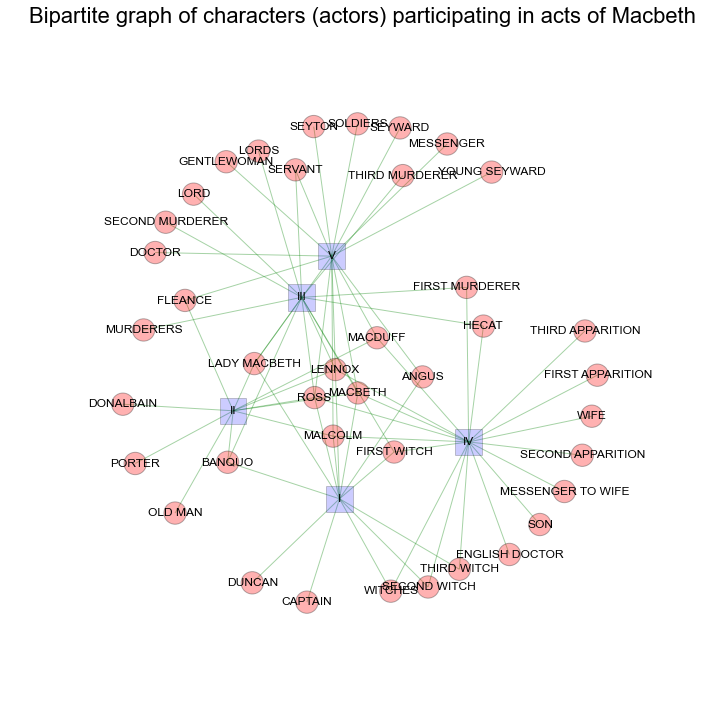

In [12]:
act_scene_graph=create_two_mode_act_scene_graph(active_actors)
print nx.info(act_scene_graph)
pos_Scene=nx.spring_layout(act_scene_graph,scale=50)
# nx.draw_networkx(act_scene_graph,pos)
fig=plt.figure(figsize=(12,12))
# print 'aa'
# print act_scene_graph.nodes()
actors=[i for j in active_actors.values() for i in j]
nx.draw_networkx_nodes(act_scene_graph,pos_Scene,nodelist=list(set(actors)),node_color='r',node_size=500, node_shape='o',alpha=.3)
nx.draw_networkx_nodes(act_scene_graph,pos_Scene,nodelist=active_actors.keys(),node_color='b',node_size=700,node_shape='s',alpha =.2)
lso=nx.draw_networkx_edges(act_scene_graph,pos_Scene,edge_color='g',alpha=0.35)
# print "be"
lsbe=nx.draw_networkx_labels(act_scene_graph,pos_Scene,font_size=12)#17)
plt.title('Bipartite graph of characters (actors) participating in acts of Macbeth',fontsize=22)
# print "be"

mon=plt.axis('off')

In [13]:
graph_dic_scene,ract_dic,pernode_dict,nodper_dic,cnum,active_actors_sc=create_graph_dict(scen_dict,pers_l,pers_dict,u,attribute_dict)
G, list_of_Graphs_final, Gagr, edgeList ,nmap ,mapping,k,n=synthetic_multi_level_dict(graph_dic_scene,pernode_dict,nodper_dic,ract_dic,No_isolates=True)
conver_rel = 0

pos_dict={}
counter=0
for k in sorted(graph_dic_scene):
    v=graph_dic_scene[k]
# for k,v in graph_dic_scene.items():
#     print k,v.nodes()
#     print v.edges()
    v.remove_nodes_from(nx.isolates(v))
#     print v,nx.isolates(v)
    print counter,
    print nx.info(v)
    print 'Number of characters (actors) appearing in Macbeth scene %s: %i' %(k,len(active_actors_sc[k]))
    conver_rel += len(v.edges())
    print
    counter+=1
    
print 'Characters (actors) appearing in Macbeth in all conversational relationships in all Acts:'  
print
for i in pernode_dict:
    print i
print
print 'The total number of characters (actors) appearing in Macbeth in all conversational relationships in all Acts is', len(pernode_dict.keys())
print 
print 'The total number of conversational relationships (edges) among characters (actors) \
taking place in all Acts of Macbeth is', conver_rel

0 Name: Act I.I
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
Number of characters (actors) appearing in Macbeth scene I.I: 3

1 Name: Act I.II
Type: Graph
Number of nodes: 6
Number of edges: 4
Average degree:   1.3333
Number of characters (actors) appearing in Macbeth scene I.II: 5

2 Name: Act I.III
Type: Graph
Number of nodes: 6
Number of edges: 7
Average degree:   2.3333
Number of characters (actors) appearing in Macbeth scene I.III: 8

3 Name: Act I.IV
Type: Graph
Number of nodes: 3
Number of edges: 2
Average degree:   1.3333
Number of characters (actors) appearing in Macbeth scene I.IV: 4

4 Name: Act I.V
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
Number of characters (actors) appearing in Macbeth scene I.V: 2

5 Name: Act I.VI
Type: Graph
Number of nodes: 0
Number of edges: 0

Number of characters (actors) appearing in Macbeth scene I.VI: 3

6 Name: Act I.VII
Type: Graph
Number of nodes: 3
Number of edges: 2
Average de

Name: 
Type: Graph
Number of nodes: 65
Number of edges: 104
Average degree:   3.2000


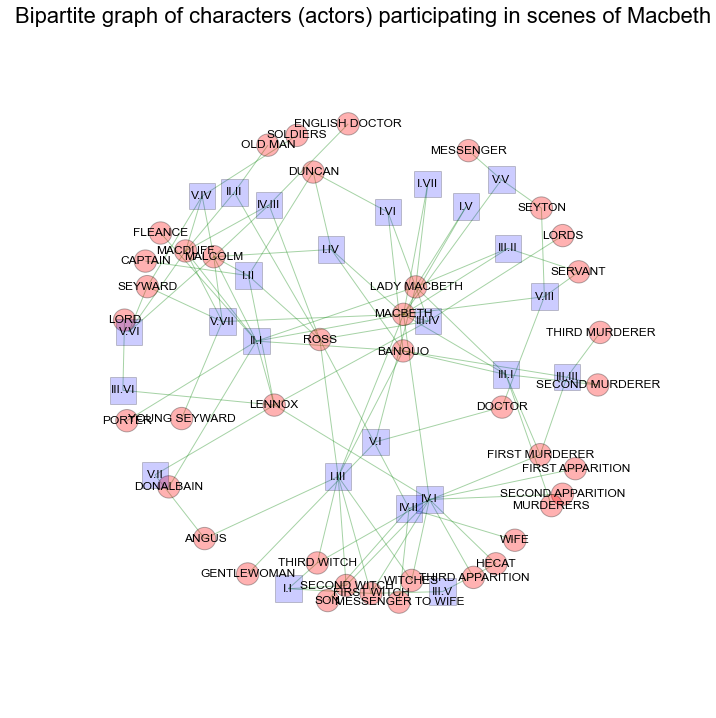

In [14]:
act_scene_graph=create_two_mode_act_scene_graph(active_actors_sc)
print nx.info(act_scene_graph)
pos_Scene=nx.spring_layout(act_scene_graph,scale=50)
# nx.draw_networkx(act_scene_graph,pos)
fig=plt.figure(figsize=(12,12))
# print 'aa'
# print act_scene_graph.nodes()
actors=[i for j in active_actors_sc.values() for i in j]
nx.draw_networkx_nodes(act_scene_graph,pos_Scene,nodelist=list(set(actors)),node_color='r',node_size=500, node_shape='o',alpha=.3)
nx.draw_networkx_nodes(act_scene_graph,pos_Scene,nodelist=active_actors_sc.keys(),node_color='b',node_size=700,node_shape='s',alpha =.2)
lso=nx.draw_networkx_edges(act_scene_graph,pos_Scene,edge_color='g',alpha=0.35)
# print "be"
lsbe=nx.draw_networkx_labels(act_scene_graph,pos_Scene,font_size=12)#17)
plt.title('Bipartite graph of characters (actors) participating in scenes of Macbeth',fontsize=22)
# print "be"

mon=plt.axis('off')
